# 

In [1]:
import json

with open('../output/hedge_output_1_eraser.json') as f:
    text_tree = json.load(f)

text_tree    

{'text_tokens': ['there',
  'may',
  'not',
  'be',
  'a',
  'critic',
  'alive',
  'who',
  'harbor',
  '##s',
  'as',
  'much',
  'affection',
  'for',
  'sh',
  '##lock',
  'monster',
  'movies',
  'as',
  'i',
  'do',
  '.',
  'i',
  'delighted',
  'in',
  'the',
  'sneak',
  '##y',
  '-',
  'smart',
  'entertainment',
  'of',
  'ron',
  'underwood',
  "'",
  's',
  'big',
  '-',
  'underground',
  '-',
  'worm',
  'yarn',
  'tremor',
  '##s',
  ';',
  'i',
  'even',
  'giggled',
  'at',
  'last',
  'year',
  "'",
  's',
  'critically',
  '-',
  'savage',
  '##d',
  'big',
  '-',
  'underwater',
  '-',
  'snake',
  'yarn',
  'ana',
  '##con',
  '##da',
  '.',
  'something',
  'about',
  'these',
  'films',
  'causes',
  'me',
  'to',
  'lower',
  'my',
  'inhibition',
  '##s',
  'and',
  'return',
  'to',
  'the',
  'saturday',
  'afternoons',
  'of',
  'my',
  'youth',
  ',',
  'spent',
  'in',
  'the',
  'company',
  'of',
  'g',
  '##hid',
  '##rah',
  ',',
  'the',
  'creature'

Score distribution

In [2]:
text_tree.keys()

dict_keys(['text_tokens', 'true_label', 'predicted_label', 'spans', 'tree'])

In [16]:
def get_token_scores(text_tree):
    levels = len(text_tree['tree'])
    last_level = str(levels - 1)
    token_scores = [text_tree['spans'][str(ts)] for ts in text_tree['tree'][last_level]]
    return token_scores

In [17]:
token_scores = get_token_scores(text_tree)
token_scores

[-0.4957999885082245,
 -0.7870000004768372,
 -0.7501999735832214,
 -0.8725000023841858,
 -0.8052999973297119,
 0.024399999529123306,
 -0.9715999960899353,
 -0.7530999779701233,
 -0.8553000092506409,
 -0.5131999850273132,
 0.04699999839067459,
 0.6531999707221985,
 -0.982699990272522,
 -0.4251999855041504,
 -0.7384999990463257,
 -0.23070000112056732,
 0.9778000116348267,
 -0.18379999697208405,
 -0.14249999821186066,
 -0.6155999898910522,
 -0.8931999802589417,
 -0.7294999957084656,
 -0.4943000078201294,
 -0.978600025177002,
 -0.8610000014305115,
 -0.8633999824523926,
 0.5006999969482422,
 -0.6129000186920166,
 -0.6879000067710876,
 -0.9749000072479248,
 -0.051899999380111694,
 -0.715399980545044,
 -0.8306000232696533,
 -0.18930000066757202,
 -0.8873000144958496,
 -0.5473999977111816,
 -0.9657999873161316,
 -0.7584999799728394,
 0.24799999594688416,
 -0.7207000255584717,
 0.9563999772071838,
 -0.698199987411499,
 -0.8873999714851379,
 -0.5544999837875366,
 -0.7235999703407288,
 -0.5120000

In [18]:
import seaborn as sns

Text(0.5, 0.98, 'Tokens scores distribution in negative text')

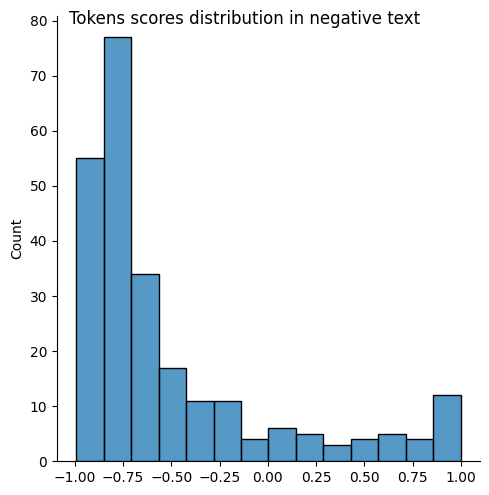

In [19]:
d = sns.displot(token_scores)
d.fig.suptitle("Tokens scores distribution in negative text")

In [22]:
print(text_tree['true_label'])
print(text_tree['predicted_label'])

0
0


In [23]:
from IPython.display import display, HTML
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import html

def scale_for_opacity(scores, min_o, max_o):
    min_score = min(scores)
    max_score = max(scores)
    score_diff = max_score - min_score
    o_diff = max_o - min_o
    opacity_scores = [(((score - min_score) / score_diff) * o_diff + min_o) for score in scores]
    return opacity_scores

def highlight_text(tokens, importance, binary_marking, cmap_name='coolwarm', max_opacity=0.9, min_opacity=0.2):
    """
    Highlights parts of text based on importance values.

    Parameters:
        tokens (list of str): List of words or tokens in the text.
        importance (list of float): List of importance scores for each token (same length as `tokens`).
        cmap_name (str): Name of the matplotlib colormap to use for highlighting.
        max_opacity (float): Maximum opacity for the highlights (values from 0 to 1).
    
    Returns:
        None: Displays the highlighted text in the notebook.
    """
    
    # Normalize importance values to a 0-1 range
    norm = mcolors.Normalize(vmin=min(importance), vmax=max(importance))
    #cmap = mcolors.Colormap(cmap_name)
    cmap = cm.get_cmap(cmap_name)  # Get a concrete colormap instance
    opacity_scores = scale_for_opacity(importance, min_opacity, max_opacity)
    
    # Build HTML with spans for highlighting
    highlighted_text = ""
    for token, score, opacity, truth in zip(tokens, importance, opacity_scores, binary_marking):
        rgba = cmap(norm(score))
        color = mcolors.to_hex(rgba)
        escaped_token = html.escape(token)
        #opacity = 0.5
        # Add underline if binary_marking indicates it
        style = f"background-color:{color};opacity:{opacity};padding:2px;"
        if truth:
            style += "font-weight:bold;"

        highlighted_text += f'<span style="{style}">{escaped_token}</span> '
    
    # Display the highlighted text
    display(HTML(f'<div style="font-family:monospace;font-size:16px;">{highlighted_text}</div>'))

In [24]:
import sys
sys.path.append("../src/utils")
repo_path = '../external_repos/eraserbenchmark-master'
sys.path.append(repo_path)
import os

from rationale_benchmark.utils import load_documents, load_datasets, annotations_from_jsonl, Annotation
data_root = os.path.join('..','external_repos','eraserbenchmark-master','data', 'movies')
documents = load_documents(data_root)
train, val, test = load_datasets(data_root)
i = 0
annotation = test[i]
evidences = annotation.all_evidences()
(docid,) = set(ev.docid for ev in evidences)
doc = documents[docid]
doc_tokens = []

for sent in doc:
    doc_tokens += sent

doc_tokens

['there',
 'may',
 'not',
 'be',
 'a',
 'critic',
 'alive',
 'who',
 'harbors',
 'as',
 'much',
 'affection',
 'for',
 'shlock',
 'monster',
 'movies',
 'as',
 'i',
 'do',
 '.',
 'i',
 'delighted',
 'in',
 'the',
 'sneaky',
 '-',
 'smart',
 'entertainment',
 'of',
 'ron',
 'underwood',
 "'s",
 'big',
 '-',
 'underground',
 '-',
 'worm',
 'yarn',
 'tremors',
 ';',
 'i',
 'even',
 'giggled',
 'at',
 'last',
 'year',
 "'s",
 'critically',
 '-',
 'savaged',
 'big',
 '-',
 'underwater',
 '-',
 'snake',
 'yarn',
 'anaconda',
 '.',
 'something',
 'about',
 'these',
 'films',
 'causes',
 'me',
 'to',
 'lower',
 'my',
 'inhibitions',
 'and',
 'return',
 'to',
 'the',
 'saturday',
 'afternoons',
 'of',
 'my',
 'youth',
 ',',
 'spent',
 'in',
 'the',
 'company',
 'of',
 'ghidrah',
 ',',
 'the',
 'creature',
 'from',
 'the',
 'black',
 'lagoon',
 'and',
 'the',
 'blob',
 '.',
 'deep',
 'rising',
 ',',
 'a',
 'big',
 '-',
 'undersea',
 '-',
 'serpent',
 'yarn',
 ',',
 'does',
 "n't",
 'quite',
 'pa

In [25]:
def prepare_truth_pred_lists(pred_scores, evidences):
    evidences_tokens = []
    len_tokens = len(pred_scores)

    for ev in evidences:
        if ev.start_token <= len_tokens:
            #start_token = tokens_map_reversed[ev.start_token][0]
            start_token = ev.start_token
    
            if ev.end_token <= len_tokens-1:
                end_token = ev.end_token
            else:
                end_token = len_tokens-1
                 
            evidences_tokens += list(range(start_token, end_token+1))

    truth = [(i in evidences_tokens) for i in range(len(pred_scores))]        
    return truth, pred_scores

truth, pred = prepare_truth_pred_lists(token_scores, evidences)

In [85]:
highlight_text(doc_tokens, pred, truth)

C:\Users\eliag\AppData\Local\Temp\ipykernel_8984\3715649949.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)  # Get a concrete colormap instance


Top negative words

In [29]:
import numpy as np
np_pred = np.array(pred)
min_index = np.argmin(np_pred)
print(min_index)

125


In [30]:
doc_tokens[min_index]

':'

In [32]:
len(doc_tokens)

616

In [ ]:
print(doc_tokens[125])

In [43]:
text_tree['text_tokens'][125]

'quite'

In [58]:
def map_tokens(text_tokens, doc_tokens):
    i = 0
    j = 0
    n = len(text_tokens)
    m = len(doc_tokens)
    tokens_map = []
    
    while i < n and j < m:
        model_token = text_tokens[i].strip().replace("#","")
        
        if model_token == doc_tokens[j]:
            tokens_map.append(j)
            j += 1
        elif model_token == "":
            tokens_map.append(None)
        else:
            found = False
            
            for k in range(1,5):
                if (i + k < n):
                    merged_token = model_token
                    #print(merged_token)
    
                    for l in range(1,k+1):
                        merged_token += text_tokens[i+l].strip().replace("#","")
                    
                    if merged_token == doc_tokens[j]:
                        found = True
                        
                        for l in range(1,k+2):
                            tokens_map.append(j)
                    
                        j += 1
                        i += k
                        break
            
        i += 1

    return tokens_map

In [59]:
tokens_map = map_tokens(text_tree['text_tokens'], doc_tokens)
print(len(tokens_map))
tokens_map

247


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 8,
 9,
 10,
 11,
 12,
 13,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 46,
 47,
 48,
 49,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 56,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 83,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 93,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 107,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 166,
 16

In [79]:
tokens_map[-5:]

[215, 216, 217, 218, 219]

In [80]:
text_tree['text_tokens'][-6:]

['##y', 'international', 'jewel', 'thief', '(', 'fa']

In [81]:
text_tree['text_tokens']

['there',
 'may',
 'not',
 'be',
 'a',
 'critic',
 'alive',
 'who',
 'harbor',
 '##s',
 'as',
 'much',
 'affection',
 'for',
 'sh',
 '##lock',
 'monster',
 'movies',
 'as',
 'i',
 'do',
 '.',
 'i',
 'delighted',
 'in',
 'the',
 'sneak',
 '##y',
 '-',
 'smart',
 'entertainment',
 'of',
 'ron',
 'underwood',
 "'",
 's',
 'big',
 '-',
 'underground',
 '-',
 'worm',
 'yarn',
 'tremor',
 '##s',
 ';',
 'i',
 'even',
 'giggled',
 'at',
 'last',
 'year',
 "'",
 's',
 'critically',
 '-',
 'savage',
 '##d',
 'big',
 '-',
 'underwater',
 '-',
 'snake',
 'yarn',
 'ana',
 '##con',
 '##da',
 '.',
 'something',
 'about',
 'these',
 'films',
 'causes',
 'me',
 'to',
 'lower',
 'my',
 'inhibition',
 '##s',
 'and',
 'return',
 'to',
 'the',
 'saturday',
 'afternoons',
 'of',
 'my',
 'youth',
 ',',
 'spent',
 'in',
 'the',
 'company',
 'of',
 'g',
 '##hid',
 '##rah',
 ',',
 'the',
 'creature',
 'from',
 'the',
 'black',
 'lagoon',
 'and',
 'the',
 'b',
 '##lo',
 '##b',
 '.',
 'deep',
 'rising',
 ',',
 'a

In [41]:
doc_tokens[:20]

['there',
 'may',
 'not',
 'be',
 'a',
 'critic',
 'alive',
 'who',
 'harbors',
 'as',
 'much',
 'affection',
 'for',
 'shlock',
 'monster',
 'movies',
 'as',
 'i',
 'do',
 '.']

In [61]:
def fix_truth_by_mapping(tokens_map, truth):
    num_tokens = len(tokens_map)
    fixed_truth = [False] * num_tokens
    
    for i in range(num_tokens):
        fixed_truth[i] = truth[tokens_map[i]]

    return fixed_truth

In [62]:
fixed_truth = fix_truth_by_mapping(tokens_map, truth)

In [86]:
highlight_text(text_tree['text_tokens'], pred, fixed_truth)

C:\Users\eliag\AppData\Local\Temp\ipykernel_8984\3715649949.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name)  # Get a concrete colormap instance


Min and max words

In [65]:
np_pred = np.array(pred)
k = 10

idx = np.argpartition(np_pred, k)
np_pred[idx[:k]]

array([-0.97369999, -0.97860003, -0.9928    , -0.97490001, -0.9799    ,
       -0.97369999, -0.9716    , -0.9824    , -0.98269999, -0.97109997])

In [68]:
np.array(text_tree['text_tokens'])[idx[:k]]

array(['ana', 'delighted', 'quite', 'smart', 'critically', 'jewel',
       'alive', 'big', 'affection', 'giggled'], dtype='<U13')

In [71]:
np_pred = np.array(pred)
k = 10

idx = np.argpartition(np_pred, -k)
np_pred[idx[-k:]]

array([0.9515    , 0.95639998, 0.95819998, 0.97780001, 0.97829998,
       0.97930002, 0.9813    , 0.98079997, 0.99870002, 0.99629998])

In [72]:
np.array(text_tree['text_tokens'])[idx[-k:]]

array(['too', 'worm', 'bait', 'monster', 'spent', 'like', 'monster',
       'excuse', 'even', 'derelict'], dtype='<U13')

AUPRC

In [74]:
from sklearn.metrics import accuracy_score, auc, average_precision_score, precision_recall_curve, roc_auc_score

precision, recall, _ = precision_recall_curve(truth, pred)
auprc = auc(recall, precision)
print("Mean auprc" , auprc)

Mean auprc 0.18484569818358093


In [78]:
len(text_tree["text_tokens"])

248

In [82]:
precision, recall, _ = precision_recall_curve(fixed_truth, pred[:247])
auprc = auc(recall, precision)
print("Mean auprc" , auprc)

Mean auprc 0.20994550746845195


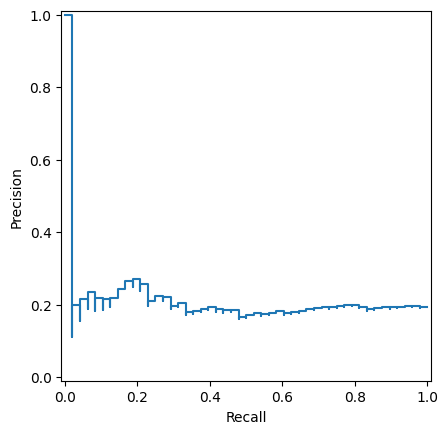

In [83]:
from sklearn.metrics import PrecisionRecallDisplay

pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()

In [84]:
all_truth = []
all_preds = []

for i in range(1,50):
    owen_values, evidences, tokens_map, doc_tokens = get_doc_owens(i)
    pred_owens = merge_owen_for_tokens(owen_values, tokens_map)
    truth, pred = prepare_truth_pred_lists(pred_owens, evidences)
    all_truth += truth
    all_preds += pred

precision, recall, _ = precision_recall_curve(all_truth, all_preds)
auprc = auc(recall, precision)
print("Mean auprc" , auprc)

NameError: name 'get_doc_owens' is not defined

In [40]:
text_tree['tree']['50'][0]

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 0.9237]

In [27]:
spans50 = [span[0] for span in text_tree['tree']['50']]
spans51 = [span[0] for span in text_tree['tree']['51']]

s50 = None

for s in spans51:
    if s not in spans50:
        print(s)

print()

for s in spans50:
    if s not in spans51:
        s50 = s
        print(s)

[239, 240, 241, 242]
[243]

[239, 240, 241, 242, 243]


In [28]:
s50

[239, 240, 241, 242, 243]

In [34]:
text_tree['spans'][50]['token_indices'] == [140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156]

True

In [36]:
a = [1,2]
b = [1, 2]
a==b

True

In [37]:
c = [2,3]
c==a

False

In [39]:
a = {}
a[str(b)] = 1
a

{'[1, 2]': 1}